In [ ]:
Decision Tree Implementation for Research

{1: 0.7139, 3: 0.7257857142857143, 5: 0.7252000000000001, 7: 0.7266571428571429, 10: 0.7215142857142857, 15: 0.7043571428571428, 20: 0.6813571428571429, 25: 0.6597000000000001, 30: 0.6465714285714286}


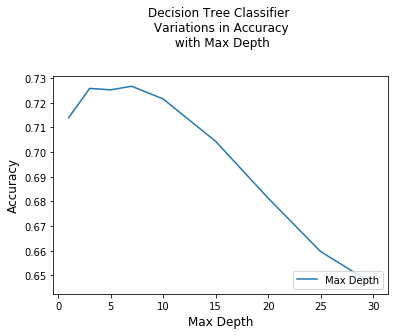

Maximum Depth 1 ----> Accuracy Score = 0.7139
Maximum Depth 3 ----> Accuracy Score = 0.7257857142857143
Maximum Depth 5 ----> Accuracy Score = 0.7252000000000001
Maximum Depth 7 ----> Accuracy Score = 0.7266571428571429
Maximum Depth 10 ----> Accuracy Score = 0.7215142857142857
Maximum Depth 15 ----> Accuracy Score = 0.7043571428571428
Maximum Depth 20 ----> Accuracy Score = 0.6813571428571429
Maximum Depth 25 ----> Accuracy Score = 0.6597000000000001
Maximum Depth 30 ----> Accuracy Score = 0.6465714285714286


In [1]:

import pandas as pd
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

class Decision_Tree():
    def __init__(self):
        self.max_depth = [1,3,5,7,10,15,20,25,30]
    
    def dataset_split(self):
        df = pd.read_csv("cardio_preprocessed.csv")  
        X = df.drop('cardio',axis=1)
        y = df.cardio
        return X,y

    def model_creation(self):
        acc_score = {}
        for i in self.max_depth:
            #acc = []
            kfold = model_selection.KFold(n_splits=5)
            model = DecisionTreeClassifier(random_state=0, max_depth=i)
            results = model_selection.cross_val_score(model, X, y, cv=kfold)
            #accuracy_score = results.mean()
            #acc.append(results.mean())
            acc_score[i] = results.mean()
            
        print(acc_score)
        return acc_score
    
    def graph(self, acc_score):
        names = list(acc_score.keys())
        values = list(acc_score.values())
        plt.plot(names,values)
        plt.title("Decision Tree Classifier \n Variations in Accuracy \n with Max Depth", pad=30)
        plt.ylabel("Accuracy", fontsize = "large")
        plt.xlabel('Max Depth', fontsize = "large")
        plt.legend(["Max Depth"], loc='lower right')
        plt.show()
        
        #print("\n",acc_score)
        #print("\nOverall Accuracy Score for Decision Tree = ",np.mean(acc_score))


d_tree = Decision_Tree()
X,y = d_tree.dataset_split()
acc_score = d_tree.model_creation()
d_tree.graph(acc_score)


for x,y in acc_score.items():
    print("Maximum Depth {0} ----> Accuracy Score = {1}". format (x, np.mean(acc_score[x])) )